In [32]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

## Reading the Data from Source file i.e application_data.csv and previous_application.csv

In [34]:
app_df = pd.read_csv("application_data.csv")
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
prev_df = pd.read_csv("previous_application.csv")
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Inspect the dataframes i.e app_df

In [36]:
app_df.shape

(307511, 122)

In [37]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [38]:
app_df.isna().sum().sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [39]:
x = len(app_df) // 2
x

153755

### cleansing the data of the dataframe app_df

In [40]:
app_df.shape

(307511, 122)

In [41]:
# If a column contains more than 50% of its values not there, delete that column

app_df = app_df[app_df.columns[app_df.isnull().sum() < x]]

app_df.shape

(307511, 81)

In [42]:
app_df.isna().sum().sort_values(ascending=False).head(22)

FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_MODE    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
NAME_TYPE_SUITE                   1292
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
dtype: int64

In [43]:
# Categorical columns 

list(set(app_df.columns) - set(app_df.describe().columns))

['ORGANIZATION_TYPE',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_EDUCATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE']

In [44]:
# Numerical Columns 

list(app_df.describe().columns)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'F

In [235]:
app_df_missing = app_df.count()/len(app_df)
app_df_missing = (1-app_df_missing)*100
app_df_missing

app_df_missing.sort_values(ascending=False).head(22)

EMERGENCYSTATE_MODE            47.398304
OCCUPATION_TYPE                31.345545
NAME_TYPE_SUITE                 0.420148
REGION_RATING_CLIENT            0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
CNT_FAM_MEMBERS                 0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
DAYS_ID_PUBLISH                 0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
FLAG_MOBIL                      0.000000
DAYS_REGISTRATION               0.000000
dtype: float64

### Missing Value Treatment

### 1. FLOORSMAX_AVG

In [46]:
app_df['FLOORSMAX_AVG'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_AVG, dtype: float64

In [47]:
app_df['FLOORSMAX_AVG'].mean()

0.2262819070368362

In [48]:
app_df['FLOORSMAX_AVG'].median()

0.1667

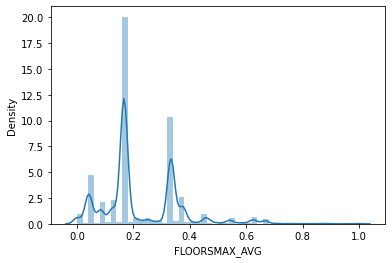

In [49]:
sns.distplot(app_df['FLOORSMAX_AVG']);

In [50]:
app_df['FLOORSMAX_AVG'].fillna(app_df['FLOORSMAX_AVG'].mean(), inplace=True)

In [51]:
app_df['FLOORSMAX_AVG'].isna().sum()

0

### 2. OCCUPATION_TYPE

In [56]:
app_df['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

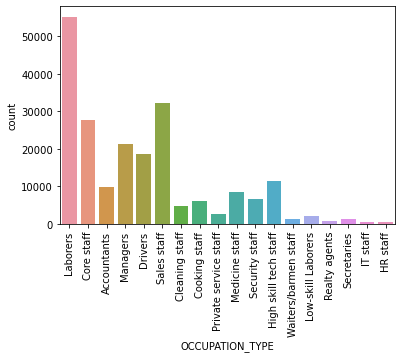

In [57]:
sns.countplot(x= 'OCCUPATION_TYPE', data=app_df)
plt.xticks(rotation=90);

### 3. EXT_SOURCE_3

In [59]:
app_df['EXT_SOURCE_3'].head(10)

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
5    0.621226
6    0.492060
7    0.540654
8    0.751724
9         NaN
Name: EXT_SOURCE_3, dtype: float64

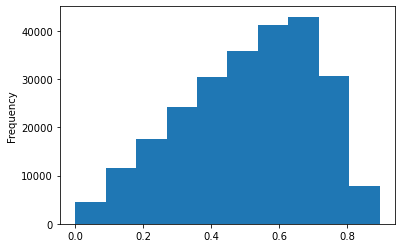

In [60]:
app_df['EXT_SOURCE_3'].plot.hist();

In [61]:
app_df['EXT_SOURCE_3'].mean()

0.5108529061800121

In [62]:
app_df['EXT_SOURCE_3'].median()

0.5352762504724826

In [63]:
app_df['EXT_SOURCE_3'].fillna(app_df['EXT_SOURCE_3'].mean(), inplace=True)

In [65]:
app_df['EXT_SOURCE_3'].isna().sum()

0

### 4. FLOORSMAX_MEDI

In [67]:
app_df.FLOORSMAX_MEDI.head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MEDI, dtype: float64

In [68]:
app_df.FLOORSMAX_MEDI.mean()

0.22589659009280993

In [69]:
app_df.FLOORSMAX_MEDI.median()

0.1667

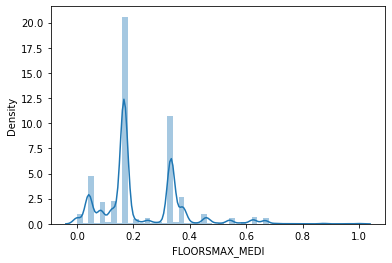

In [70]:
sns.distplot(app_df['FLOORSMAX_MEDI']);


In [71]:
app_df.FLOORSMAX_MEDI.fillna(app_df.FLOORSMAX_MEDI.mean(),inplace=True)

In [72]:
app_df.FLOORSMAX_MEDI.isna().sum()

0

### 5. AMT_REQ_CREDIT_BUREAU_QRT

In [73]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [79]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()


41519

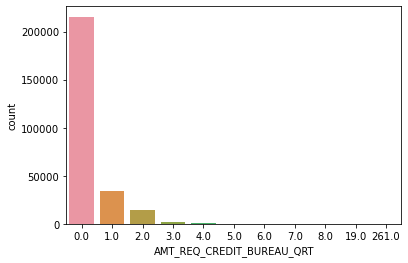

In [85]:
sns.countplot(x= 'AMT_REQ_CREDIT_BUREAU_QRT', data=app_df);

In [87]:
#  Replace by mode
app_df['AMT_REQ_CREDIT_BUREAU_QRT'] = app_df['AMT_REQ_CREDIT_BUREAU_QRT'].mode().iloc[0]

In [88]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum()

0

### 6. FLOORSMAX_MODE

In [90]:
app_df.FLOORSMAX_MODE.head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MODE, dtype: float64

In [91]:
app_df.FLOORSMAX_MODE.mean()

0.22231504747867964

In [92]:
app_df.FLOORSMAX_MODE.median()

0.1667

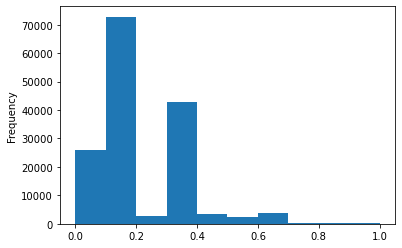

In [93]:
app_df['FLOORSMAX_MODE'].plot.hist();

In [94]:
app_df['FLOORSMAX_MODE'].fillna(app_df.FLOORSMAX_MODE.mean(),inplace=True)

In [95]:
app_df['FLOORSMAX_MODE'].isna().sum()

0

### 7. YEARS_BEGINEXPLUATATION_AVG

In [97]:
app_df.YEARS_BEGINEXPLUATATION_AVG.head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [98]:
app_df.YEARS_BEGINEXPLUATATION_AVG.mean()

0.9777348581622732

In [99]:
app_df.YEARS_BEGINEXPLUATATION_AVG.median()

0.9816

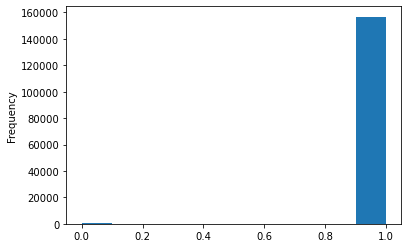

In [101]:
app_df.YEARS_BEGINEXPLUATATION_AVG.plot.hist();

In [102]:
app_df.YEARS_BEGINEXPLUATATION_AVG.fillna(app_df.YEARS_BEGINEXPLUATATION_AVG.mean(),inplace=True)
app_df.YEARS_BEGINEXPLUATATION_AVG.isna().sum()

0

### 8. YEARS_BEGINEXPLUATATION_MODE

In [103]:
app_df.YEARS_BEGINEXPLUATATION_MODE.head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [104]:
app_df.YEARS_BEGINEXPLUATATION_MODE.mean()

0.9770653729428284

In [105]:
app_df.YEARS_BEGINEXPLUATATION_MODE.median()

0.9816

In [107]:
app_df.YEARS_BEGINEXPLUATATION_MODE.fillna(app_df.YEARS_BEGINEXPLUATATION_MODE.mean(),inplace=True)
app_df.YEARS_BEGINEXPLUATATION_MODE.isna().sum()

0

### 9. YEARS_BEGINEXPLUATATION_MEDI

In [109]:
app_df.YEARS_BEGINEXPLUATATION_MEDI.head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [110]:
app_df.YEARS_BEGINEXPLUATATION_MEDI.mean()

0.9777522640694213

In [111]:
app_df.YEARS_BEGINEXPLUATATION_MEDI.median()

0.9816

In [112]:
app_df.YEARS_BEGINEXPLUATATION_MEDI.fillna(app_df.YEARS_BEGINEXPLUATATION_MEDI.mean(),inplace=True)
app_df.YEARS_BEGINEXPLUATATION_MEDI.isna().sum()

0

### 10. TOTALAREA_MODE

In [114]:
app_df.TOTALAREA_MODE.head()

0    0.0149
1    0.0714
2       NaN
3       NaN
4       NaN
Name: TOTALAREA_MODE, dtype: float64

In [115]:
app_df.TOTALAREA_MODE.mean()

0.10254666268544003

In [116]:
app_df.TOTALAREA_MODE.median()

0.0688

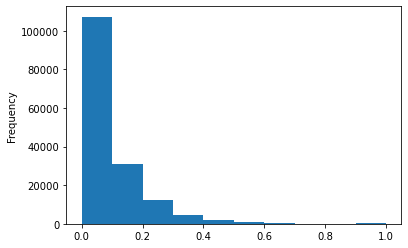

In [118]:
app_df.TOTALAREA_MODE.plot.hist();

In [120]:
app_df.TOTALAREA_MODE.fillna(app_df.TOTALAREA_MODE.median(),inplace=True)


### 11. EMERGENCYSTATE_MODE

In [122]:
app_df.EMERGENCYSTATE_MODE.head()

0     No
1     No
2    NaN
3    NaN
4    NaN
Name: EMERGENCYSTATE_MODE, dtype: object

In [125]:
app_df.EMERGENCYSTATE_MODE.value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

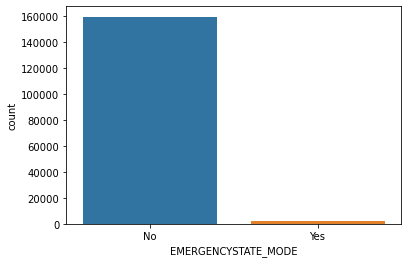

In [128]:
sns.countplot(x='EMERGENCYSTATE_MODE',data=app_df);

### 12. AMT_REQ_CREDIT_BUREAU_YEAR

In [130]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.head()

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [131]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.mean()

1.899974435321363

In [132]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.median()

1.0

<AxesSubplot:ylabel='Frequency'>

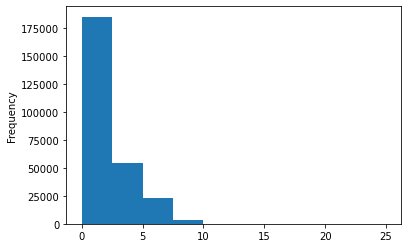

In [133]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.plot.hist()

In [142]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app_df.AMT_REQ_CREDIT_BUREAU_YEAR.mean(),inplace=True)

### 13. AMT_REQ_CREDIT_BUREAU_MON

In [135]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [136]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.mean()

0.26739526000781977

In [137]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.median()

0.0

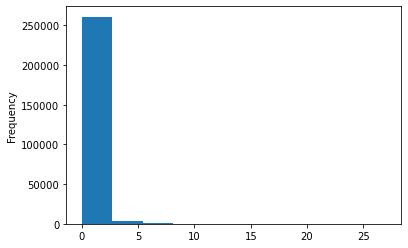

In [139]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.plot.hist();

In [143]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.fillna(app_df.AMT_REQ_CREDIT_BUREAU_MON.mean(),inplace=True)

### 14. AMT_REQ_CREDIT_BUREAU_WEEK

In [145]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [146]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.mean()

0.0343619356973142

In [147]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.median()

0.0

In [148]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app_df.AMT_REQ_CREDIT_BUREAU_WEEK.mean(),inplace=True)

### 15. AMT_REQ_CREDIT_BUREAU_DAY

In [151]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [152]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.mean()

0.0070002105326475985

In [153]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.median()

0.0

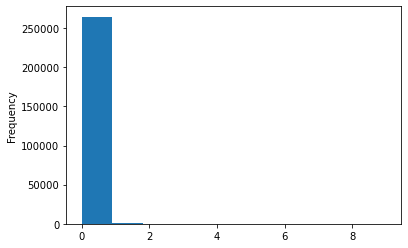

In [156]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.plot.hist();

In [157]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app_df.AMT_REQ_CREDIT_BUREAU_DAY.mean(),inplace=True)

### 16. AMT_REQ_CREDIT_BUREAU_HOUR

In [159]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [160]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.mean()

0.006402448193930645

In [161]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.median()

0.0

In [162]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app_df.AMT_REQ_CREDIT_BUREAU_HOUR.mean(),inplace=True)

### 17. NAME_TYPE_SUITE

In [164]:
app_df.NAME_TYPE_SUITE.head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

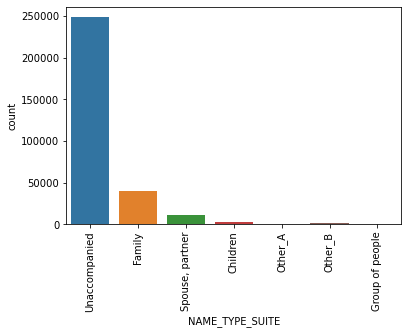

In [165]:
sns.countplot(x='NAME_TYPE_SUITE',data=app_df);
plt.xticks(rotation=90);

### 18. DEF_60_CNT_SOCIAL_CIRCLE

In [167]:
app_df.DEF_60_CNT_SOCIAL_CIRCLE.head()

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [168]:
app_df.DEF_60_CNT_SOCIAL_CIRCLE.mean()

0.10004894123788705

In [169]:
app_df.DEF_60_CNT_SOCIAL_CIRCLE.median()

0.0

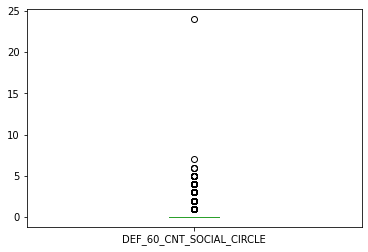

In [175]:
app_df.DEF_60_CNT_SOCIAL_CIRCLE.plot.box();

In [176]:
app_df.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
24.0         1
7.0          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [177]:
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df['AMT_REQ_CREDIT_BUREAU_QRT'].mode().iloc[0],inplace=True)

### 19. OBS_60_CNT_SOCIAL_CIRCLE

In [179]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.head()

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [180]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.mean()

1.4052921791901856

In [181]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.median()

0.0

In [182]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
344.0         1
47.0          1
26.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [185]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.mode().iloc[0]

0.0

In [186]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.mode().iloc[0],inplace=True)

### 20. DEF_30_CNT_SOCIAL_CIRCLE

In [188]:
app_df.DEF_30_CNT_SOCIAL_CIRCLE.head()

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [189]:
app_df.DEF_30_CNT_SOCIAL_CIRCLE.mean()

0.1434206662533851

In [190]:
app_df.DEF_30_CNT_SOCIAL_CIRCLE.median()

0.0

In [191]:
app_df.DEF_30_CNT_SOCIAL_CIRCLE.mode().iloc[0]

0.0

In [192]:
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.mode().iloc[0],inplace=True)

### 21. OBS_30_CNT_SOCIAL_CIRCLE

In [194]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.head()

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [195]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

1.4222454239942575

In [196]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.median()

0.0

In [197]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.mode().iloc[0]

0.0

In [199]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.mode().iloc[0],inplace=True)

### 22. EXT_SOURCE_2

In [201]:
app_df.EXT_SOURCE_2.head()

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64

In [202]:
app_df.EXT_SOURCE_2.mean()

0.5143926741308463

In [203]:
app_df.EXT_SOURCE_2.median()

0.5659614260608526

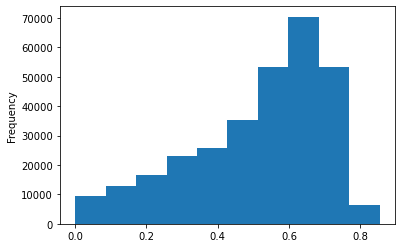

In [206]:
app_df.EXT_SOURCE_2.plot.hist();

In [207]:
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.mean(),inplace=True)

### 23. AMT_GOODS_PRICE

In [209]:
app_df.AMT_GOODS_PRICE.head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

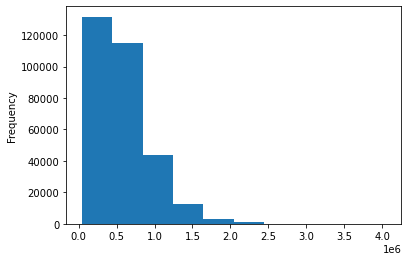

In [211]:
app_df.AMT_GOODS_PRICE.plot.hist();

In [212]:
app_df.AMT_GOODS_PRICE.mean()

538396.2074288895

In [213]:
app_df.AMT_GOODS_PRICE.median()

450000.0

In [214]:
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(),inplace=True)

### 24. CNT_FAM_MEMBERS

In [216]:
app_df.CNT_FAM_MEMBERS.head()

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [217]:
app_df.CNT_FAM_MEMBERS.mean()

2.152665450442101

In [218]:
app_df.CNT_FAM_MEMBERS.median()

2.0

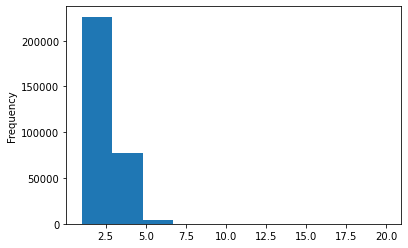

In [219]:
app_df.CNT_FAM_MEMBERS.plot.hist();

In [220]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mean(),inplace=True)

### 25. AMT_ANNUITY

In [222]:
app_df.AMT_ANNUITY.head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [223]:
app_df.AMT_ANNUITY.mean()

27108.573909183444

In [224]:
app_df.AMT_ANNUITY.median()

24903.0

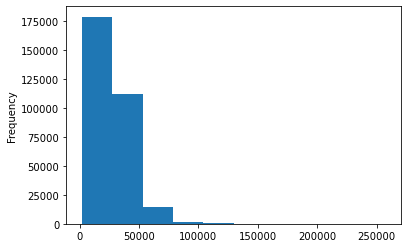

In [226]:
app_df.AMT_ANNUITY.plot.hist();

In [227]:
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.mean(),inplace=True)

### 27. DAYS_LAST_PHONE_CHANGE

In [229]:
app_df.DAYS_LAST_PHONE_CHANGE.head()

0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [230]:
app_df.DAYS_LAST_PHONE_CHANGE.mean()

-962.8587883320868

In [231]:
app_df.DAYS_LAST_PHONE_CHANGE.median()

-757.0

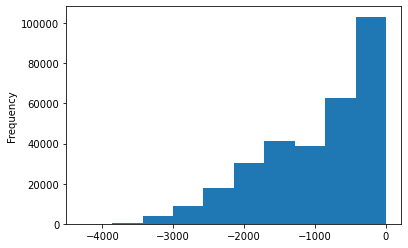

In [233]:
app_df.DAYS_LAST_PHONE_CHANGE.plot.hist();

In [234]:
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.mean(),inplace=True)

## <---> Dataset is Clean now. <--->

In [236]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [238]:
app_df[['TARGET']].sample(10)

,TARGET
146399,0
164220,0
234485,1
123537,0
10425,0
277171,0
142866,0
304815,1
93913,0
167650,0


In [239]:
app_df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### Check for Imbalance

In [242]:
# Ratio Imbalence

((app_df.TARGET==0).sum()) / ((app_df.TARGET==1).sum())

11.387150050352467

In [244]:
app_df_0 = app_df.loc[app_df.TARGET==0]
app_df_1 = app_df.loc[app_df.TARGET==1]

In [245]:
app_df_0.shape

(282686, 81)

In [246]:
app_df_1.shape

(24825, 81)

In [248]:
# Cateorical columns

cat_col = list(set(app_df.columns) - set(app_df.describe().columns))

cat_col

['ORGANIZATION_TYPE',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_EDUCATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE']

In [249]:
# Numerical columns:

num_col = app_df.describe().columns
num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

### Plotting

In [256]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()


In [253]:
app_categorical = app_df.select_dtypes(include=['object']).columns
app_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [254]:
len(app_categorical)

13

### Univariate Analysis

Plotting  NAME_CONTRACT_TYPE


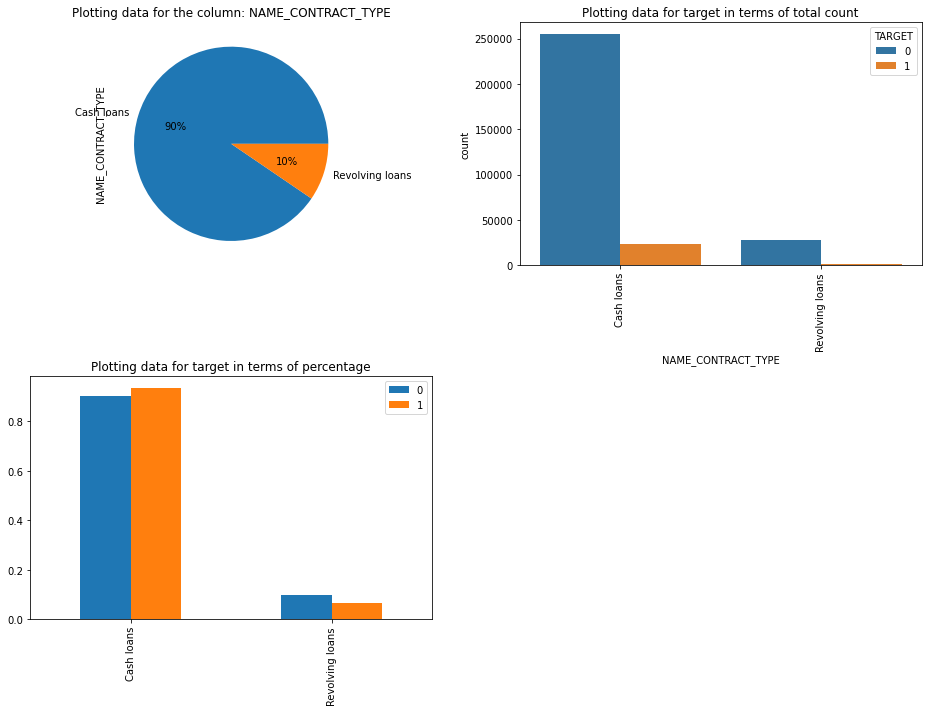



Plotting  CODE_GENDER


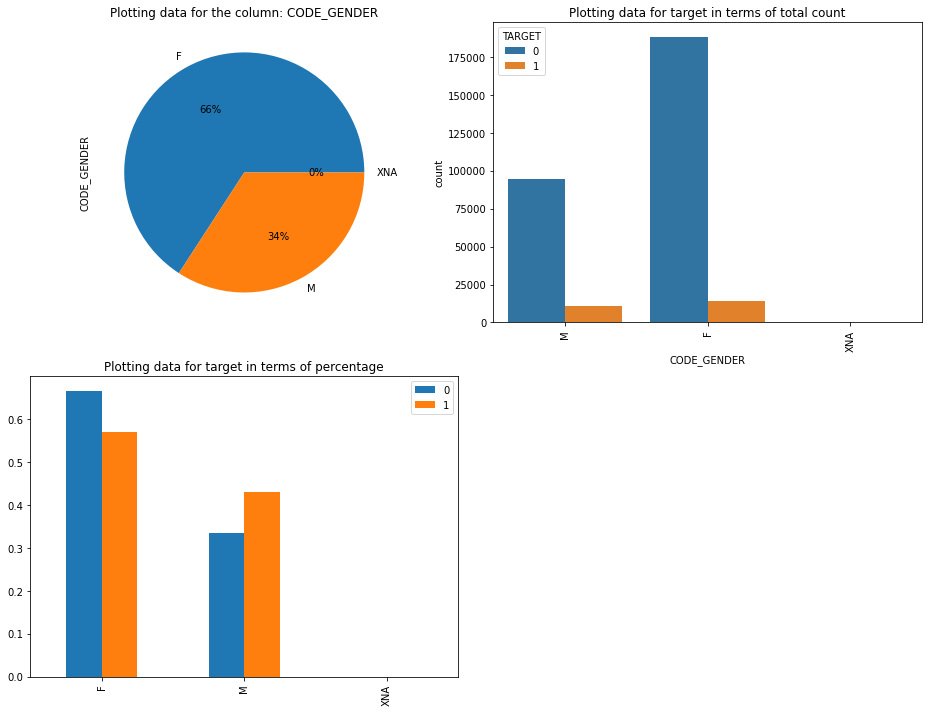



Plotting  FLAG_OWN_CAR


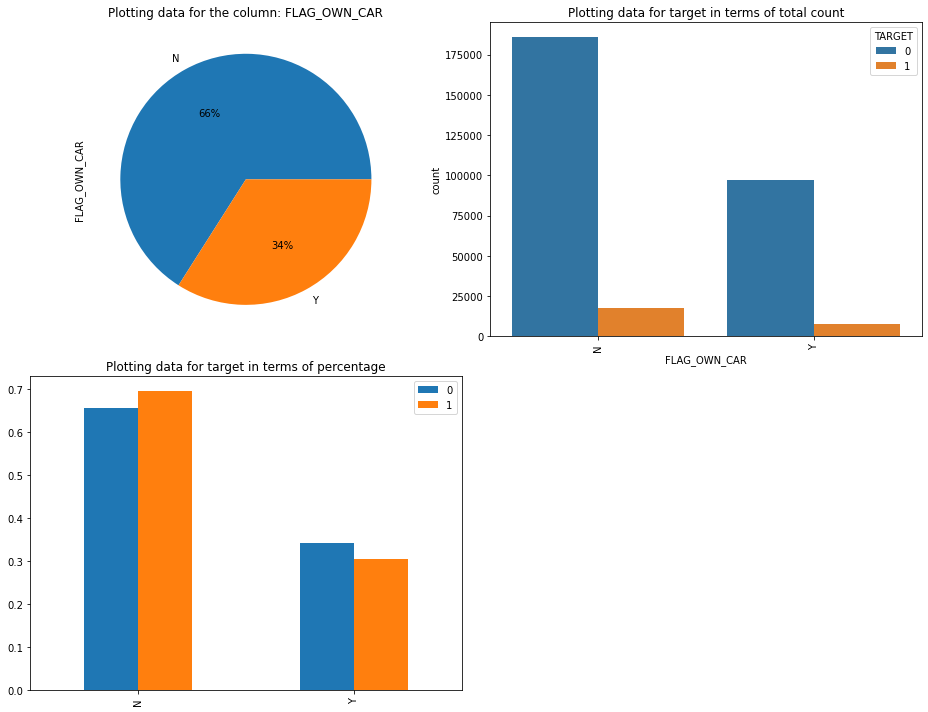



Plotting  FLAG_OWN_REALTY


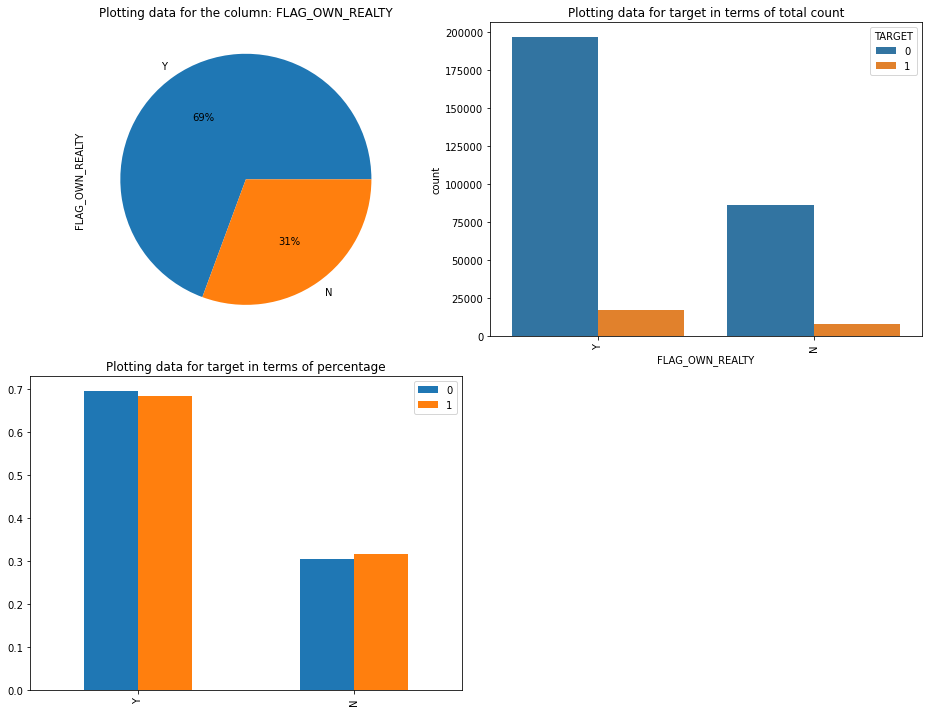



Plotting  NAME_TYPE_SUITE


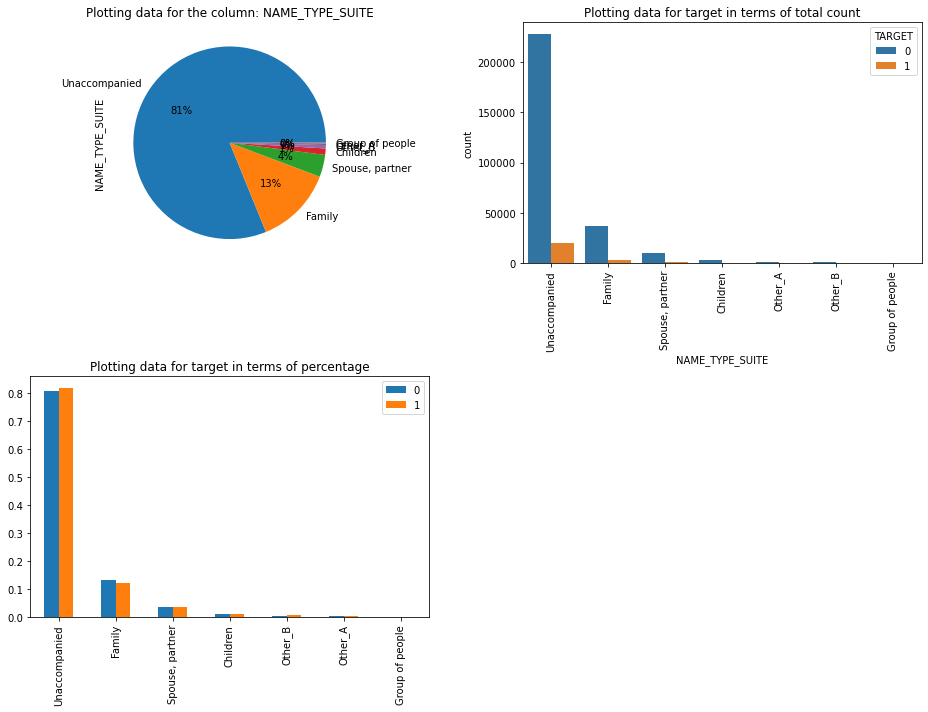



Plotting  NAME_INCOME_TYPE


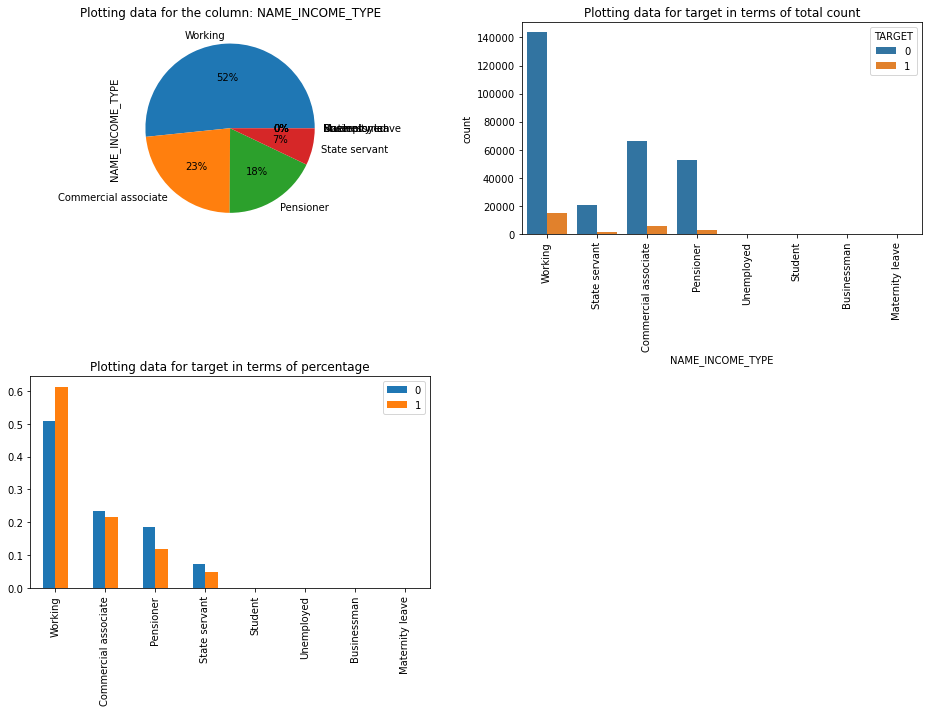



Plotting  NAME_EDUCATION_TYPE


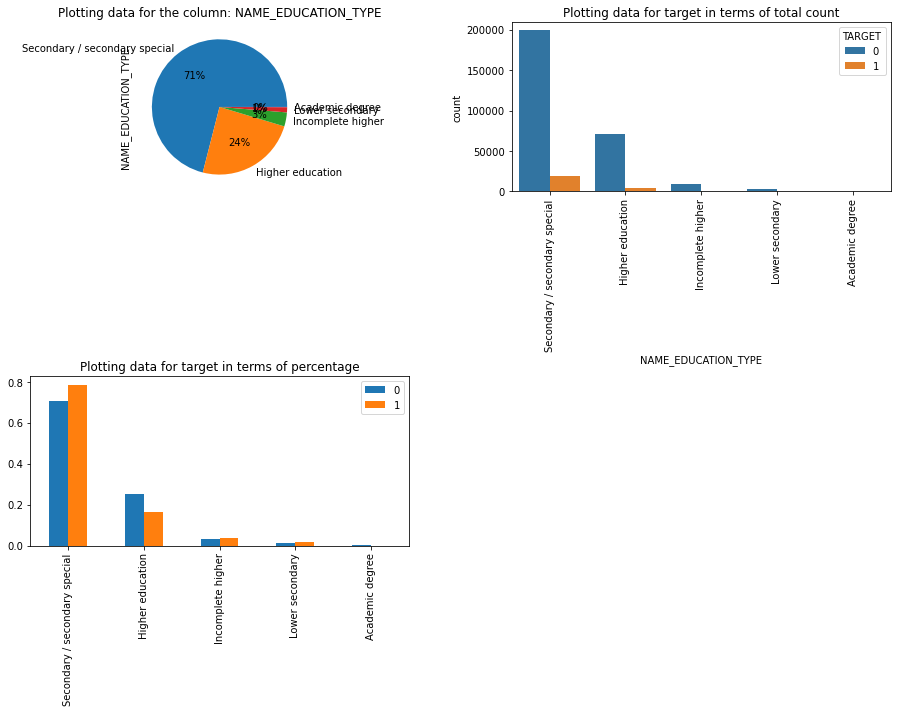



Plotting  NAME_FAMILY_STATUS


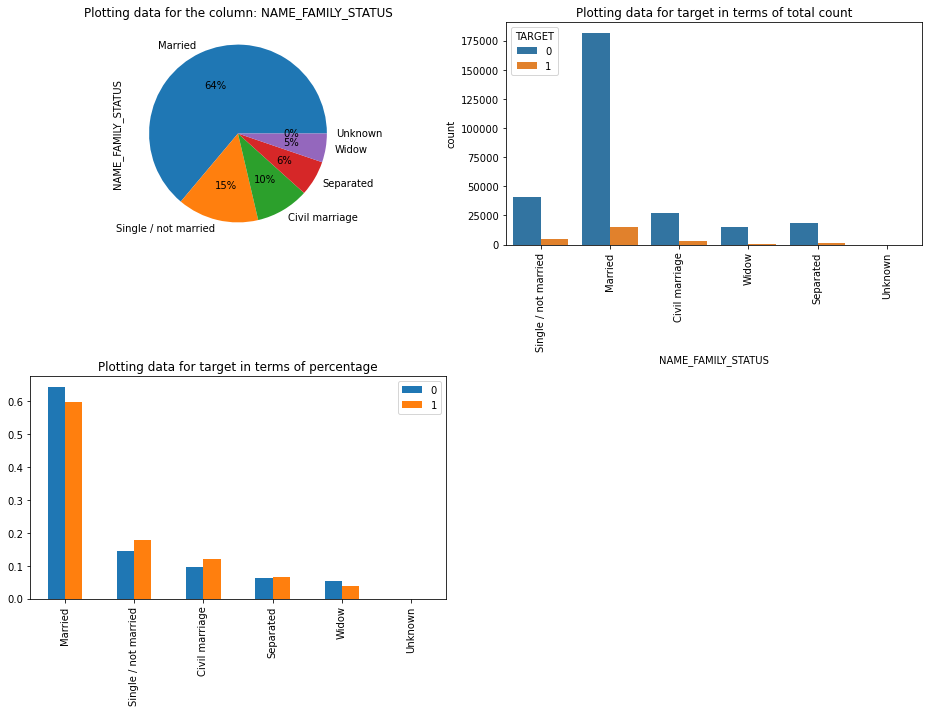



Plotting  NAME_HOUSING_TYPE


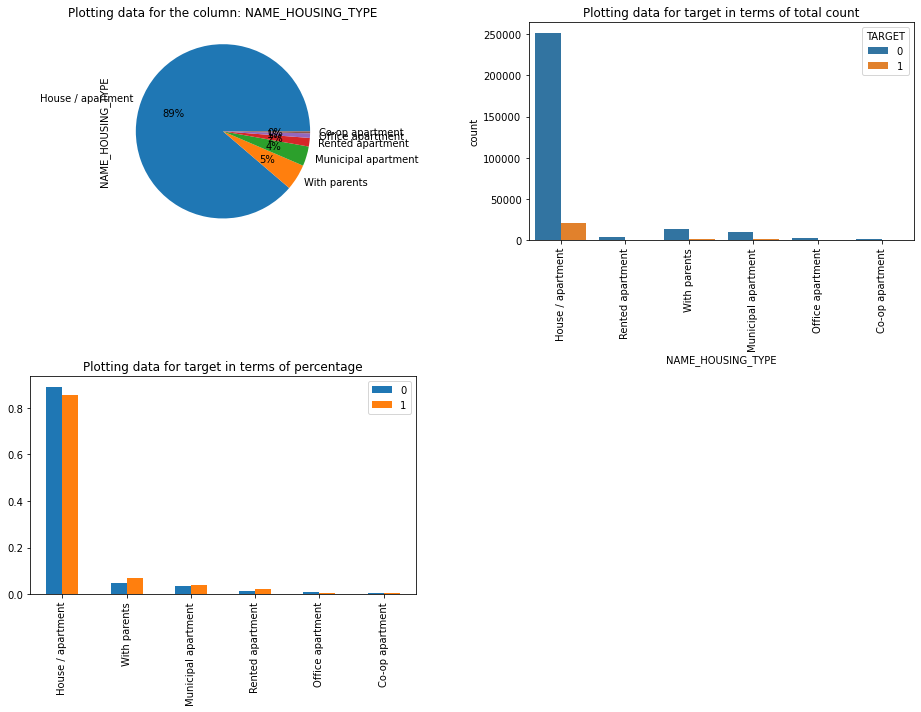



Plotting  OCCUPATION_TYPE


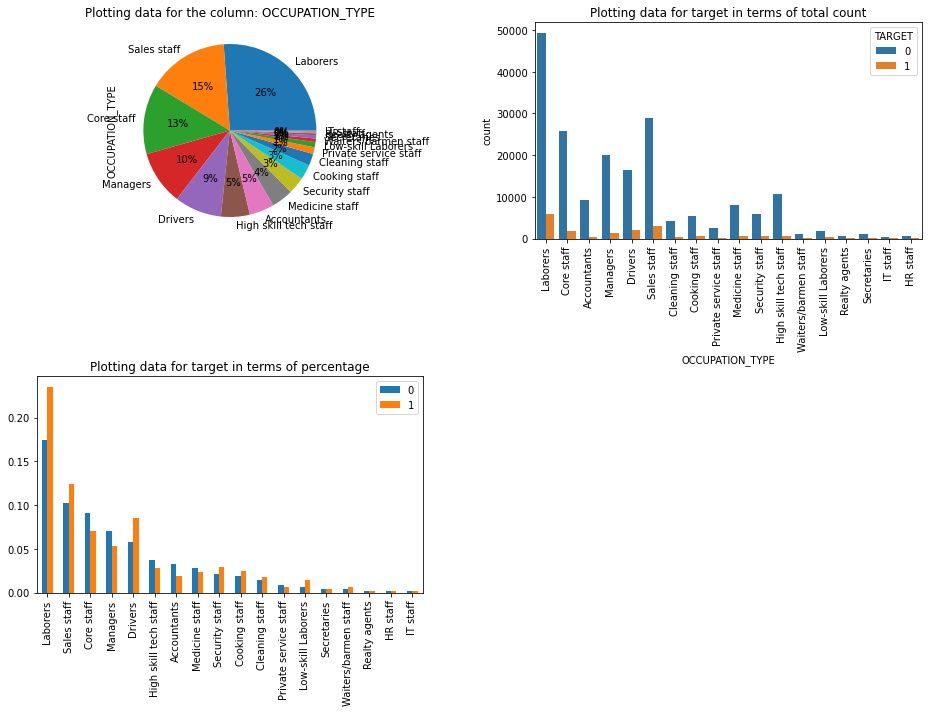



Plotting  WEEKDAY_APPR_PROCESS_START


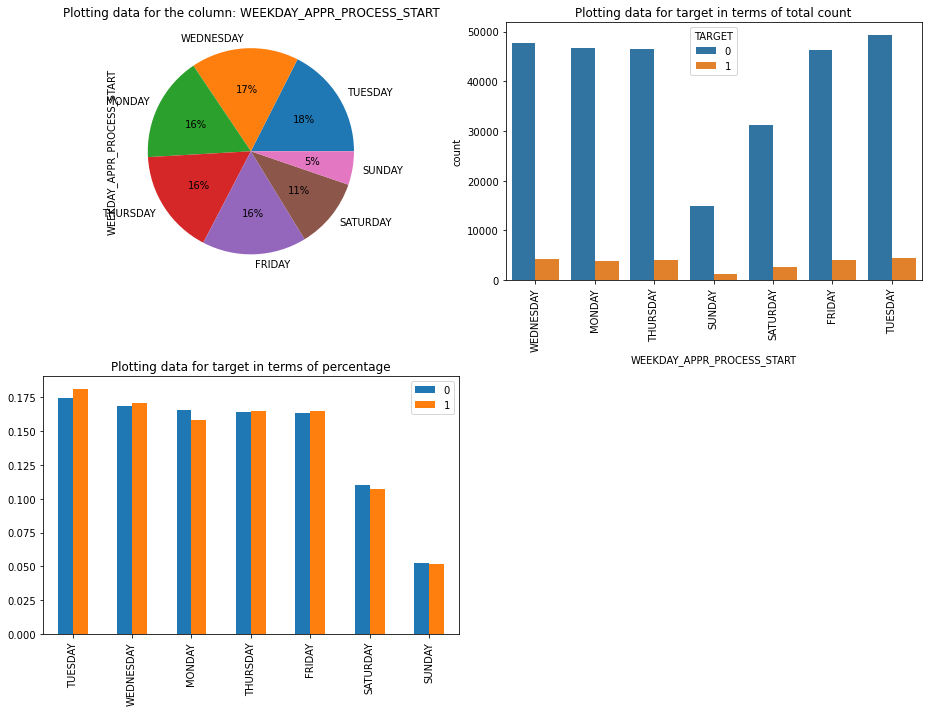



Plotting  ORGANIZATION_TYPE


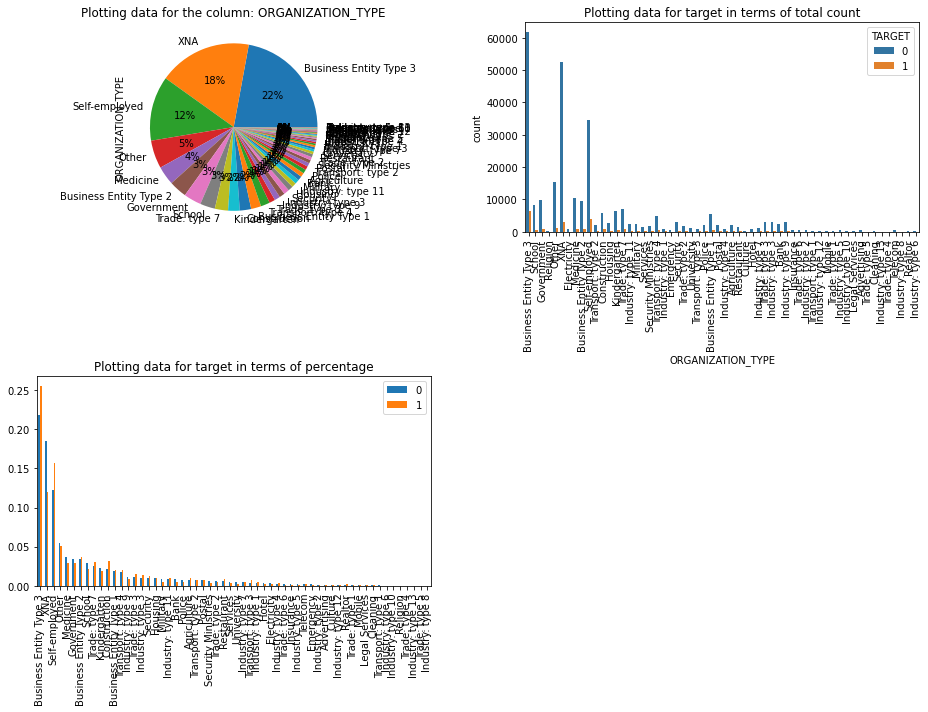



Plotting  EMERGENCYSTATE_MODE


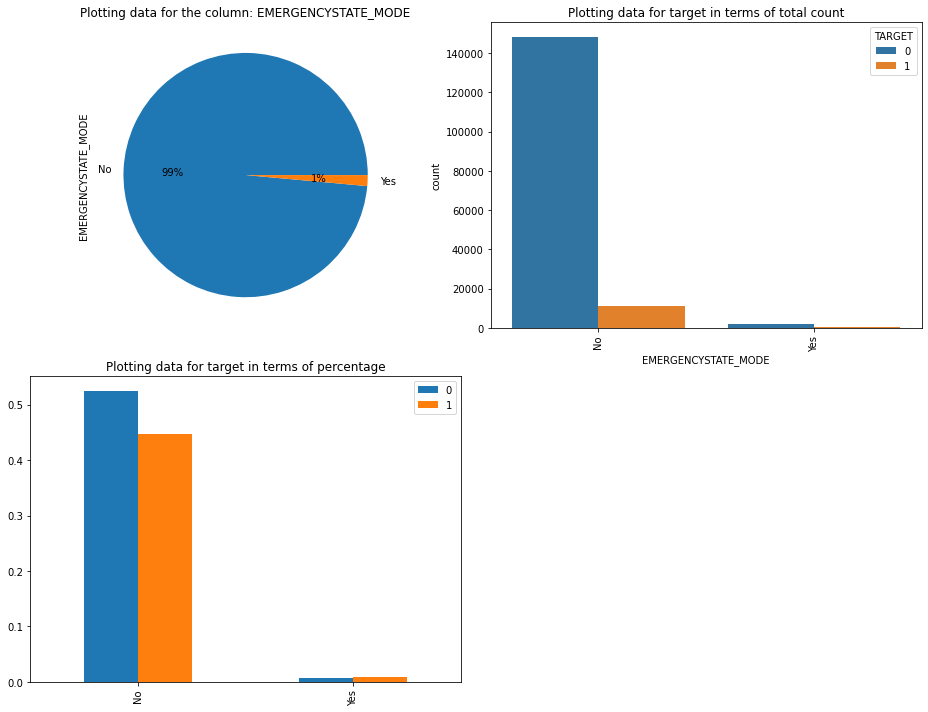

In [257]:
for column in app_categorical:
    print("Plotting ",column)
    plotting(app_df, app_df_0, app_df_1, column)
    print("\n==============================================================\n")

### Numerical Columns

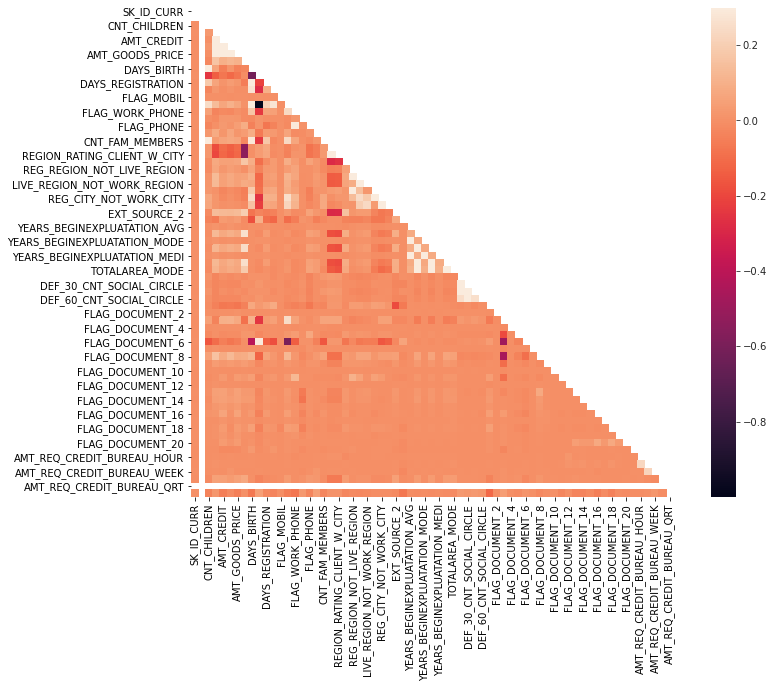

In [258]:
import numpy as np
corr = app_df_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

### Finding the top correlation

In [259]:
app_df_0.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000235,0.000360,-0.001346,0.001744,...,0.001194,0.000676,0.000832,-0.000485,-0.001751,-0.001607,0.002353,0.000049,NaN,0.004055
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000559,-0.024363,0.336966,-0.243356,...,0.004181,0.001078,0.001302,-0.002983,-0.000406,0.000601,-0.001530,-0.009765,NaN,-0.039888
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418949,0.349426,0.167851,0.062609,-0.141250,...,0.008214,0.005762,0.000840,-0.000869,0.001225,0.006809,0.005406,0.053423,NaN,0.025524
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771297,0.987022,0.100604,-0.047378,-0.072515,...,0.035527,0.021560,0.032151,-0.015602,-0.003503,0.004118,-0.001768,0.050719,NaN,-0.045879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.001607,NaN,0.000601,0.006809,0.004118,0.002209,0.004516,0.001826,0.002562,-0.000744,...,0.013196,0.001280,0.000025,-0.000971,0.229065,1.000000,0.220087,-0.004753,NaN,-0.003797
AMT_REQ_CREDIT_BUREAU_WEEK,0.002353,NaN,-0.001530,0.005406,-0.001768,0.011726,-0.001482,-0.002295,-0.000980,0.002144,...,-0.004244,-0.001021,-0.001545,0.000518,0.004576,0.220087,1.000000,-0.014248,NaN,0.019085
AMT_REQ_CREDIT_BUREAU_MON,0.000049,NaN,-0.009765,0.053423,0.050719,0.035327,0.052400,0.072792,0.002572,-0.033089,...,-0.002334,-0.002361,0.001385,-0.002943,0.000528,-0.004753,-0.014248,1.000000,NaN,-0.004892
AMT_REQ_CREDIT_BUREAU_QRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
app_df_0.corr().abs()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,0.000716,0.001739,0.000342,0.000068,0.000235,0.000360,0.001346,0.001744,...,0.001194,0.000676,0.000832,0.000485,0.001751,0.001607,0.002353,0.000049,NaN,0.004055
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.000716,NaN,1.000000,0.027397,0.003081,0.020905,0.000559,0.024363,0.336966,0.243356,...,0.004181,0.001078,0.001302,0.002983,0.000406,0.000601,0.001530,0.009765,NaN,0.039888
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418949,0.349426,0.167851,0.062609,0.141250,...,0.008214,0.005762,0.000840,0.000869,0.001225,0.006809,0.005406,0.053423,NaN,0.025524
AMT_CREDIT,0.000342,NaN,0.003081,0.342799,1.000000,0.771297,0.987022,0.100604,0.047378,0.072515,...,0.035527,0.021560,0.032151,0.015602,0.003503,0.004118,0.001768,0.050719,NaN,0.045879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.001607,NaN,0.000601,0.006809,0.004118,0.002209,0.004516,0.001826,0.002562,0.000744,...,0.013196,0.001280,0.000025,0.000971,0.229065,1.000000,0.220087,0.004753,NaN,0.003797
AMT_REQ_CREDIT_BUREAU_WEEK,0.002353,NaN,0.001530,0.005406,0.001768,0.011726,0.001482,0.002295,0.000980,0.002144,...,0.004244,0.001021,0.001545,0.000518,0.004576,0.220087,1.000000,0.014248,NaN,0.019085
AMT_REQ_CREDIT_BUREAU_MON,0.000049,NaN,0.009765,0.053423,0.050719,0.035327,0.052400,0.072792,0.002572,0.033089,...,0.002334,0.002361,0.001385,0.002943,0.000528,0.004753,0.014248,1.000000,NaN,0.004892
AMT_REQ_CREDIT_BUREAU_QRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
app_df_0.corr().abs().unstack()

SK_ID_CURR                  SK_ID_CURR                    1.000000
                            TARGET                             NaN
                            CNT_CHILDREN                  0.000716
                            AMT_INCOME_TOTAL              0.001739
                            AMT_CREDIT                    0.000342
                                                            ...   
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_DAY     0.003797
                            AMT_REQ_CREDIT_BUREAU_WEEK    0.019085
                            AMT_REQ_CREDIT_BUREAU_MON     0.004892
                            AMT_REQ_CREDIT_BUREAU_QRT          NaN
                            AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 4624, dtype: float64

In [262]:
app_df_0.corr().abs().unstack().sort_values(kind='quicksort')

FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_WEEK    3.991697e-07
AMT_REQ_CREDIT_BUREAU_WEEK  FLAG_MOBIL                    3.991697e-07
FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_HOUR    4.721428e-07
AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_MOBIL                    4.721428e-07
FLAG_DOCUMENT_2             AMT_REQ_CREDIT_BUREAU_WEEK    1.197526e-06
                                                              ...     
AMT_REQ_CREDIT_BUREAU_QRT   AMT_REQ_CREDIT_BUREAU_MON              NaN
                            AMT_REQ_CREDIT_BUREAU_QRT              NaN
                            AMT_REQ_CREDIT_BUREAU_YEAR             NaN
AMT_REQ_CREDIT_BUREAU_YEAR  TARGET                                 NaN
                            AMT_REQ_CREDIT_BUREAU_QRT              NaN
Length: 4624, dtype: float64

In [263]:
correlation_0 = app_df_0.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_0

FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_WEEK    3.991697e-07
AMT_REQ_CREDIT_BUREAU_WEEK  FLAG_MOBIL                    3.991697e-07
FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_HOUR    4.721428e-07
AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_MOBIL                    4.721428e-07
FLAG_DOCUMENT_2             AMT_REQ_CREDIT_BUREAU_WEEK    1.197526e-06
                                                              ...     
OBS_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      1.000000e+00
TOTALAREA_MODE              TOTALAREA_MODE                1.000000e+00
FLOORSMAX_MEDI              FLOORSMAX_MEDI                1.000000e+00
FLOORSMAX_MODE              FLOORSMAX_MODE                1.000000e+00
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000e+00
Length: 4356, dtype: float64

In [264]:
correlation_0 = correlation_0[correlation_0 != 1.0]
correlation_0

FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_WEEK    3.991697e-07
AMT_REQ_CREDIT_BUREAU_WEEK  FLAG_MOBIL                    3.991697e-07
FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_HOUR    4.721428e-07
AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_MOBIL                    4.721428e-07
FLAG_DOCUMENT_2             AMT_REQ_CREDIT_BUREAU_WEEK    1.197526e-06
                                                              ...     
FLOORSMAX_MEDI              FLOORSMAX_AVG                 9.970185e-01
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      9.985103e-01
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      9.985103e-01
FLAG_EMP_PHONE              DAYS_EMPLOYED                 9.997584e-01
DAYS_EMPLOYED               FLAG_EMP_PHONE                9.997584e-01
Length: 4290, dtype: float64

In [266]:
app_df_1.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001814,0.006301,-0.001254,-0.005151,...,-0.009181,-0.006382,0.003781,0.006932,-0.010956,-0.007256,-0.002734,0.005963,NaN,0.007970
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,0.004796,-0.001675,0.031257,-0.008111,-0.031975,0.259109,-0.191942,...,0.004333,-0.001370,-0.002395,0.001136,-0.000322,-0.011816,-0.010766,-0.011958,NaN,-0.031838
AMT_INCOME_TOTAL,-0.010165,NaN,0.004796,1.000000,0.038131,0.046421,0.037591,0.009135,0.003096,-0.014979,...,-0.002177,-0.000371,-0.000450,-0.000647,0.000672,-0.000219,0.000033,0.003823,NaN,0.002109
AMT_CREDIT,-0.001290,NaN,-0.001675,0.038131,1.000000,0.752195,0.982783,0.069161,-0.135316,-0.000968,...,0.011174,0.013442,0.016949,-0.021964,-0.005382,0.002948,0.007030,0.049010,NaN,-0.031116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.007256,NaN,-0.011816,-0.000219,0.002948,-0.000221,0.004100,-0.004886,-0.006699,0.019357,...,0.005447,-0.001649,-0.001854,-0.001679,0.246744,1.000000,0.184101,-0.012712,NaN,0.001351
AMT_REQ_CREDIT_BUREAU_WEEK,-0.002734,NaN,-0.010766,0.000033,0.007030,0.028100,0.007329,0.002628,-0.005027,0.013347,...,-0.006997,-0.003789,-0.004298,-0.003831,0.006233,0.184101,1.000000,-0.012016,NaN,0.016863
AMT_REQ_CREDIT_BUREAU_MON,0.005963,NaN,-0.011958,0.003823,0.049010,0.047772,0.052139,0.063914,-0.004114,-0.023216,...,0.011566,-0.006894,-0.000134,-0.006888,-0.007898,-0.012712,-0.012016,1.000000,NaN,-0.003167
AMT_REQ_CREDIT_BUREAU_QRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
app_df_1.corr().abs()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,0.005144,0.010165,0.001290,0.007578,0.001814,0.006301,0.001254,0.005151,...,0.009181,0.006382,0.003781,0.006932,0.010956,0.007256,0.002734,0.005963,NaN,0.007970
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.005144,NaN,1.000000,0.004796,0.001675,0.031257,0.008111,0.031975,0.259109,0.191942,...,0.004333,0.001370,0.002395,0.001136,0.000322,0.011816,0.010766,0.011958,NaN,0.031838
AMT_INCOME_TOTAL,0.010165,NaN,0.004796,1.000000,0.038131,0.046421,0.037591,0.009135,0.003096,0.014979,...,0.002177,0.000371,0.000450,0.000647,0.000672,0.000219,0.000033,0.003823,NaN,0.002109
AMT_CREDIT,0.001290,NaN,0.001675,0.038131,1.000000,0.752195,0.982783,0.069161,0.135316,0.000968,...,0.011174,0.013442,0.016949,0.021964,0.005382,0.002948,0.007030,0.049010,NaN,0.031116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.007256,NaN,0.011816,0.000219,0.002948,0.000221,0.004100,0.004886,0.006699,0.019357,...,0.005447,0.001649,0.001854,0.001679,0.246744,1.000000,0.184101,0.012712,NaN,0.001351
AMT_REQ_CREDIT_BUREAU_WEEK,0.002734,NaN,0.010766,0.000033,0.007030,0.028100,0.007329,0.002628,0.005027,0.013347,...,0.006997,0.003789,0.004298,0.003831,0.006233,0.184101,1.000000,0.012016,NaN,0.016863
AMT_REQ_CREDIT_BUREAU_MON,0.005963,NaN,0.011958,0.003823,0.049010,0.047772,0.052139,0.063914,0.004114,0.023216,...,0.011566,0.006894,0.000134,0.006888,0.007898,0.012712,0.012016,1.000000,NaN,0.003167
AMT_REQ_CREDIT_BUREAU_QRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
app_df_1.corr().abs().unstack()

SK_ID_CURR                  SK_ID_CURR                    1.000000
                            TARGET                             NaN
                            CNT_CHILDREN                  0.005144
                            AMT_INCOME_TOTAL              0.010165
                            AMT_CREDIT                    0.001290
                                                            ...   
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_DAY     0.001351
                            AMT_REQ_CREDIT_BUREAU_WEEK    0.016863
                            AMT_REQ_CREDIT_BUREAU_MON     0.003167
                            AMT_REQ_CREDIT_BUREAU_QRT          NaN
                            AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 4624, dtype: float64

In [269]:
app_df_1.corr().abs().unstack().sort_values(kind='quicksort')

FLAG_DOCUMENT_20              REGION_RATING_CLIENT            0.000010
REGION_RATING_CLIENT          FLAG_DOCUMENT_20                0.000010
AMT_REQ_CREDIT_BUREAU_WEEK    YEARS_BEGINEXPLUATATION_MODE    0.000010
YEARS_BEGINEXPLUATATION_MODE  AMT_REQ_CREDIT_BUREAU_WEEK      0.000010
LIVE_REGION_NOT_WORK_REGION   REG_CITY_NOT_LIVE_CITY          0.000011
                                                                ...   
AMT_REQ_CREDIT_BUREAU_YEAR    FLAG_MOBIL                           NaN
                              FLAG_DOCUMENT_4                      NaN
                              FLAG_DOCUMENT_10                     NaN
                              FLAG_DOCUMENT_12                     NaN
                              AMT_REQ_CREDIT_BUREAU_QRT            NaN
Length: 4624, dtype: float64

In [271]:
correlation_1 = app_df_1.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_1

FLAG_DOCUMENT_20              REGION_RATING_CLIENT            0.000010
REGION_RATING_CLIENT          FLAG_DOCUMENT_20                0.000010
AMT_REQ_CREDIT_BUREAU_WEEK    YEARS_BEGINEXPLUATATION_MODE    0.000010
YEARS_BEGINEXPLUATATION_MODE  AMT_REQ_CREDIT_BUREAU_WEEK      0.000010
LIVE_REGION_NOT_WORK_REGION   REG_CITY_NOT_LIVE_CITY          0.000011
                                                                ...   
TOTALAREA_MODE                TOTALAREA_MODE                  1.000000
FLOORSMAX_MEDI                FLOORSMAX_MEDI                  1.000000
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MEDI    1.000000
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MODE    1.000000
AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR      1.000000
Length: 3844, dtype: float64

In [272]:
correlation_1 = correlation_1[correlation_1 != 1.0]
correlation_1

FLAG_DOCUMENT_20              REGION_RATING_CLIENT            0.000010
REGION_RATING_CLIENT          FLAG_DOCUMENT_20                0.000010
AMT_REQ_CREDIT_BUREAU_WEEK    YEARS_BEGINEXPLUATATION_MODE    0.000010
YEARS_BEGINEXPLUATATION_MODE  AMT_REQ_CREDIT_BUREAU_WEEK      0.000010
LIVE_REGION_NOT_WORK_REGION   REG_CITY_NOT_LIVE_CITY          0.000011
                                                                ...   
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997233
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998270
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998270
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999702
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999702
Length: 3782, dtype: float64

### Analysing through scatterplot

In [273]:
train_categorical = app_df.select_dtypes(include=['int','float']).columns
train_categorical

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

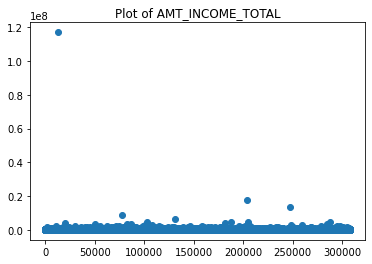

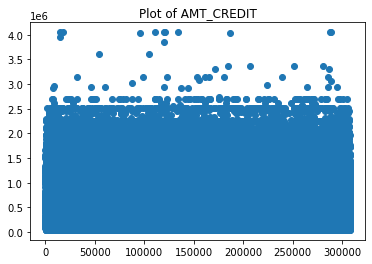

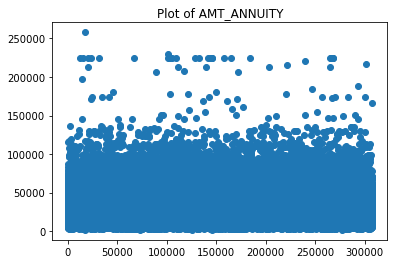

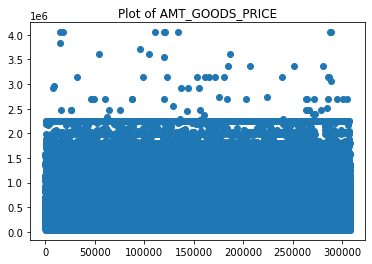

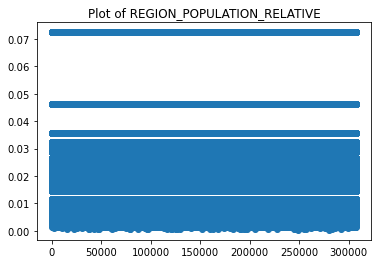

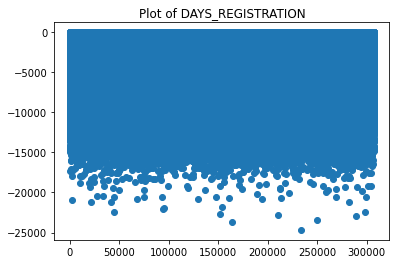

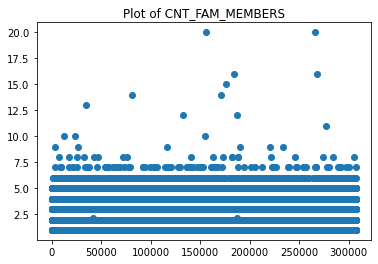

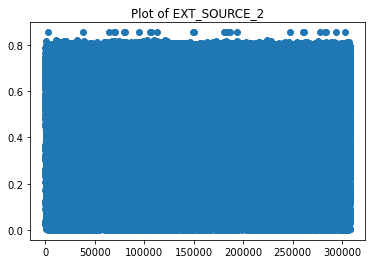

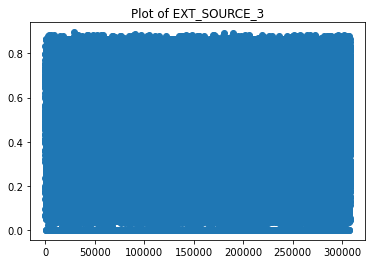

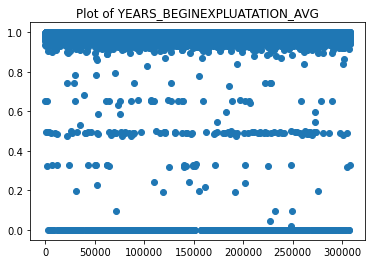

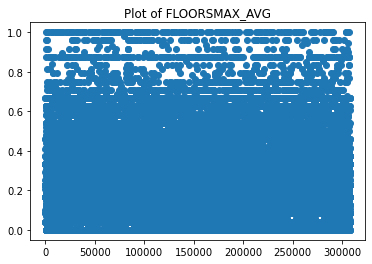

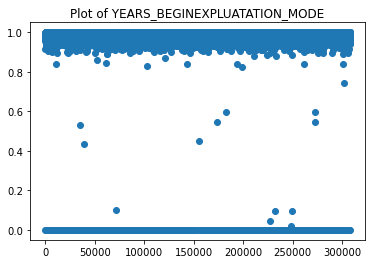

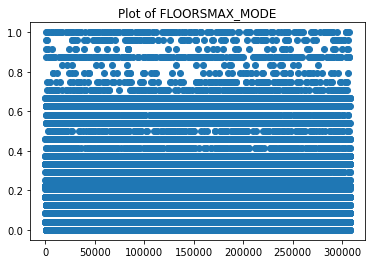

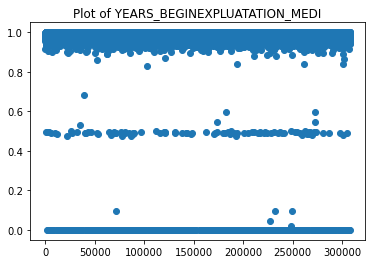

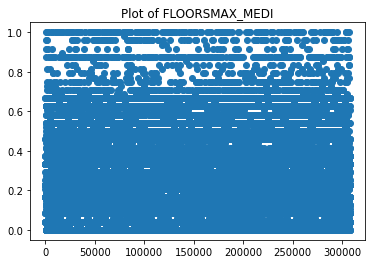

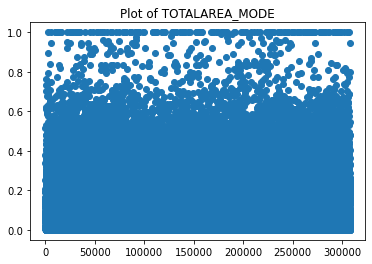

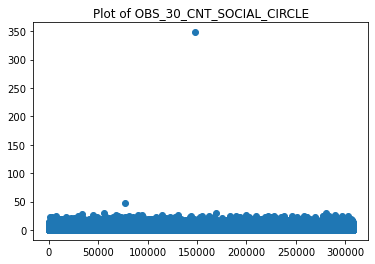

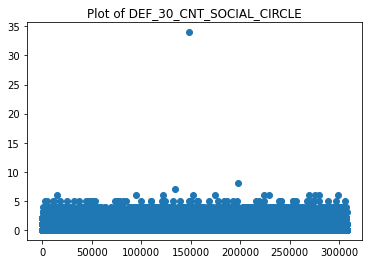

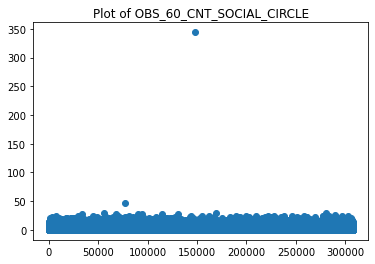

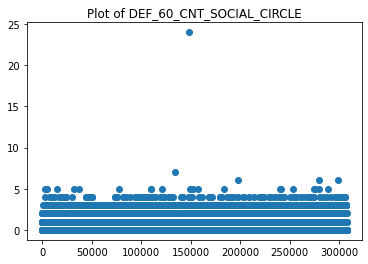

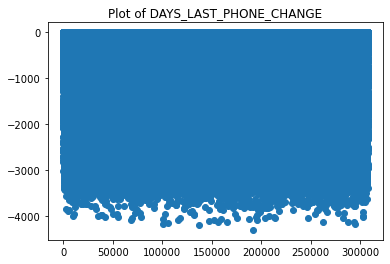

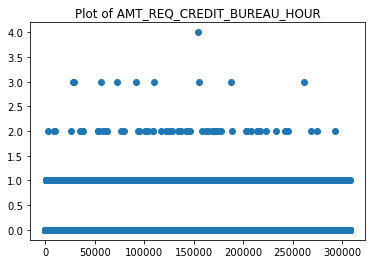

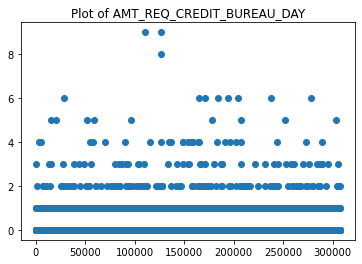

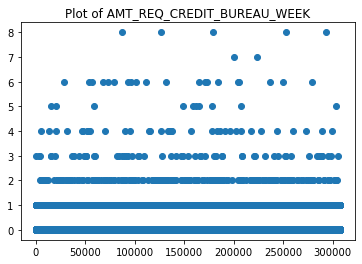

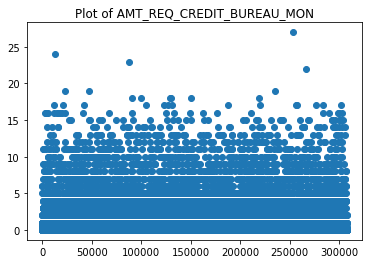

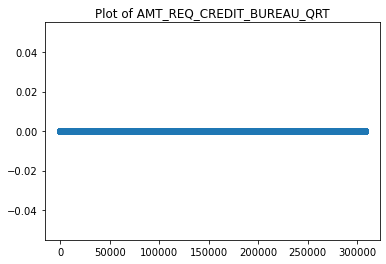

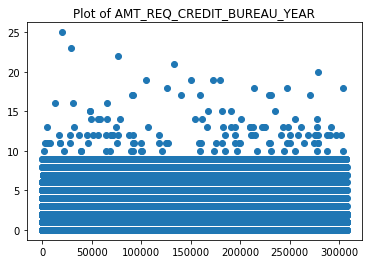

In [275]:
for column in train_categorical:
    title = "Plot of "+column
    plt.scatter(app_df.index, app_df[column])
    plt.title(title)
    plt.show()
    print("\n=======================================\n")

### Reading Previous Application

In [281]:
prev_app_df = pd.read_csv("previous_application.csv")
prev_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
prev_app_df.shape

(1670214, 37)

In [283]:
prev_app_df.SK_ID_PREV.value_counts()

1000983    1
2428426    1
1026910    1
1024863    1
2448896    1
          ..
1287969    1
1294114    1
1292067    1
1281828    1
1001961    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [284]:
prev_app_df.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

#### There are duplicate 'SK_ID_CURR' as a person could have taken loan multiple times

In [285]:
previous_train = app_df.merge(prev_app_df,left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'inner')

In [286]:
previous_train.shape

(1413701, 117)

In [287]:
previous_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [289]:
previous_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPL

#### The merged dataframe also has multiple values of SK_ID_CURR

In [291]:
previous_train.SK_ID_CURR.value_counts().head()

265681    73
173680    72
242412    68
206783    67
382179    64
Name: SK_ID_CURR, dtype: int64

#### Creating two datasets based on TARGET column values i.e 1 or 0

In [292]:
ptrain_0 = previous_train.loc[previous_train.TARGET==0]
ptrain_1 = previous_train.loc[previous_train.TARGET==1]

In [293]:
train_0 = app_df.loc[app_df.TARGET==0]
train_1 = app_df.loc[app_df.TARGET==1]

In [296]:
def plotting(column,hue):
    
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))
    
    
    ax1 = plt.subplot(221)
    app_df[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0'] = ((train_0[col].value_counts())/len(train_0))
    df['1'] = ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax2)
    plt.title("Plotting data for target in terms of total count")


    ax3 = plt.subplot(223)
    sns.countplot(x=col,hue=hue,data=ptrain_0, ax=ax3)
    plt.xticks(rotation=90)
    plt.title("Plotting data for Target=0 in terms of percentage")
    
    ax4 = plt.subplot(224)
    sns.countplot(x=col,hue=hue,data=ptrain_1, ax=ax4)
    plt.xticks(rotation=90)
    plt.title("Plotting data for Target=1 in terms of percentage")


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()


### Bivariate Analysis

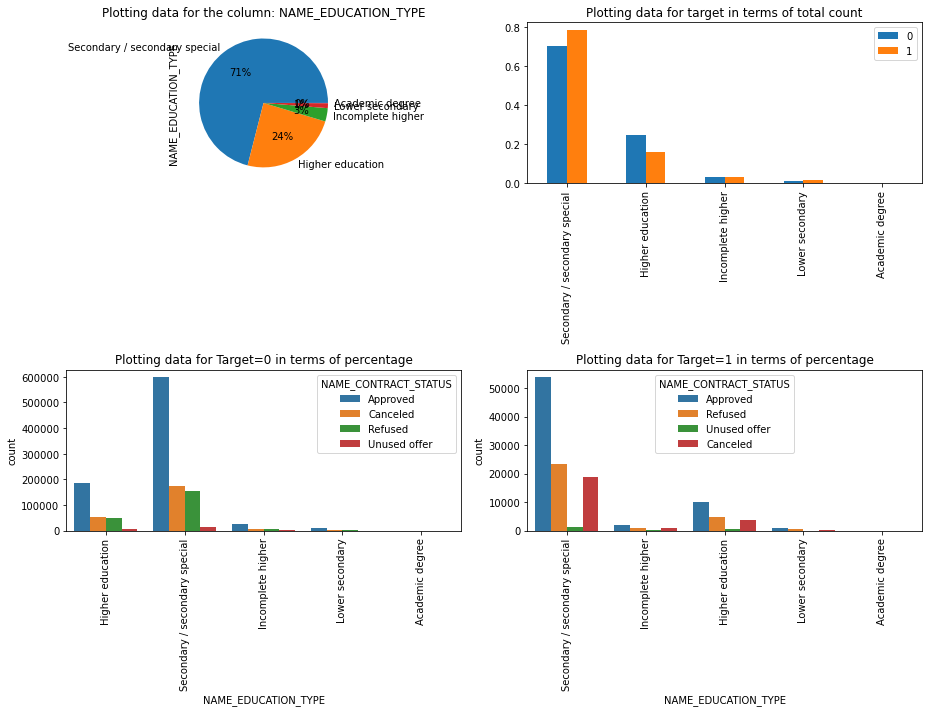

In [297]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

# END OF EDA